<a href="https://colab.research.google.com/github/jxxngho/BoostCourse_1/blob/master/K-beauty%20%EC%98%A8%EB%9D%BC%EC%9D%B8%20%ED%8C%90%EB%A7%A4%EB%B6%84%EC%84%9D/k_beauty_oversea_online_sale_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 한글폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

In [8]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요. 

!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# os 별로 폰트를 다르게 설정해 줍니다.
    
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [10]:
# %ls data

In [11]:
from glob import glob

# glob("data/*.csv")

In [12]:
df_raw = pd.read_csv("/content/지역별___상품군별_온라인쇼핑_해외직접구매액_20230506005902.csv", 
                     encoding="cp949")
# df_raw = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale.csv.zip", 
#                      encoding="cp949")
df_raw.shape

(323, 42)

In [13]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["지역별(1)"].value_counts()
# df_raw.columns

아시아     102
유럽       85
북미       51
합계       17
대양주      17
중남미      17
아프리카     17
기타       17
Name: 지역별(1), dtype: int64

In [14]:
# 미국 데이터만 따로 보기
df_raw[df_raw["지역별(1)"]=='북미']

,지역별(1),지역별(2),지역별(3),상품군별(1),상품군별(2),2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,...,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4 p)
119,북미,소계,소계,합계,소계,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,508091
120,북미,소계,소계,컴퓨터 및 주변기기,소계,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,NaN
121,북미,소계,소계,가전·전자·통신기기,소계,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,NaN
122,북미,소계,소계,가전·전자·통신기기,가전·전자,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,NaN
123,북미,소계,소계,가전·전자·통신기기,통신기기,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,NaN
124,북미,소계,소계,소프트웨어,소계,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,NaN
125,북미,소계,소계,서 적,소계,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,NaN
126,북미,소계,소계,사무·문구,소계,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,NaN
127,북미,소계,소계,음반·비디오·악기,소계,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,NaN
128,북미,소계,소계,의류 및 패션 관련 상품,소계,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,NaN


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [15]:
df_raw=df_raw.drop(["지역별(2)","지역별(3)","상품군별(2)"],axis=1)
df_raw.columns

Index(['지역별(1)', '상품군별(1)', '2014.1/4', '2014.2/4', '2014.3/4', '2014.4/4',
       '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4', '2016.2/4',
       '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4', '2017.4/4',
       '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4', '2019.2/4',
       '2019.3/4', '2019.4/4', '2020.1/4', '2020.2/4', '2020.3/4', '2020.4/4',
       '2021.1/4', '2021.2/4', '2021.3/4', '2021.4/4', '2022.1/4', '2022.2/4',
       '2022.3/4', '2022.4/4', '2023.1/4 p)'],
      dtype='object')

In [16]:
df =df_raw.melt(id_vars=["지역별(1)", "상품군별(1)"],var_name="기간",value_name="백만원")
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11951 entries, 0 to 11950
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역별(1)   11951 non-null  object
 1   상품군별(1)  11951 non-null  object
 2   기간       11951 non-null  object
 3   백만원      11650 non-null  object
dtypes: object(4)
memory usage: 373.6+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [17]:
df["연도"]=df["기간"].map(lambda x : int(x.split('.')[0]))
df.head()

,지역별(1),상품군별(1),기간,백만원,연도
0,합계,합계,2014.1/4,378879,2014
1,합계,컴퓨터 및 주변기기,2014.1/4,7857,2014
2,합계,가전·전자·통신기기,2014.1/4,18924,2014
3,합계,가전·전자·통신기기,2014.1/4,-,2014
4,합계,가전·전자·통신기기,2014.1/4,-,2014


In [18]:
df["분기"]=df["기간"].map(lambda x : int(x.split('.')[1].split("/")[0]))
df.head()
# df.info()

,지역별(1),상품군별(1),기간,백만원,연도,분기
0,합계,합계,2014.1/4,378879,2014,1
1,합계,컴퓨터 및 주변기기,2014.1/4,7857,2014,1
2,합계,가전·전자·통신기기,2014.1/4,18924,2014,1
3,합계,가전·전자·통신기기,2014.1/4,-,2014,1
4,합계,가전·전자·통신기기,2014.1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [19]:
import numpy as np
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,지역별(1),상품군별(1),기간,백만원,연도,분기
0,합계,합계,2014.1/4,378879.0,2014,1
1,합계,컴퓨터 및 주변기기,2014.1/4,7857.0,2014,1
2,합계,가전·전자·통신기기,2014.1/4,18924.0,2014,1
3,합계,가전·전자·통신기기,2014.1/4,NaN,2014,1
4,합계,가전·전자·통신기기,2014.1/4,NaN,2014,1


In [20]:
df

,지역별(1),상품군별(1),기간,백만원,연도,분기
0,합계,합계,2014.1/4,378879.0,2014,1
1,합계,컴퓨터 및 주변기기,2014.1/4,7857.0,2014,1
2,합계,가전·전자·통신기기,2014.1/4,18924.0,2014,1
3,합계,가전·전자·통신기기,2014.1/4,NaN,2014,1
4,합계,가전·전자·통신기기,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...
11946,기타,아동·유아용품,2023.1/4 p),NaN,2023,1
11947,기타,음·식료품,2023.1/4 p),NaN,2023,1
11948,기타,농축수산물,2023.1/4 p),NaN,2023,1
11949,기타,생활·자동차용품,2023.1/4 p),NaN,2023,1


### 필요없는 데이터 제거하기

In [21]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["지역별(1)"] != "합계") & (df["상품군별(1)"] != "합계")].copy()
# df["판매유형별"] != "계"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 18 to 11950
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역별(1)   10656 non-null  object 
 1   상품군별(1)  10656 non-null  object 
 2   기간       10656 non-null  object 
 3   백만원      4507 non-null   float64
 4   연도       10656 non-null  int64  
 5   분기       10656 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 582.8+ KB


In [22]:
df.isnull().sum()
# 금액이 없는 데이터도 있다! 

지역별(1)        0
상품군별(1)       0
기간            0
백만원        6149
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

<Axes: xlabel='연도', ylabel='백만원'>

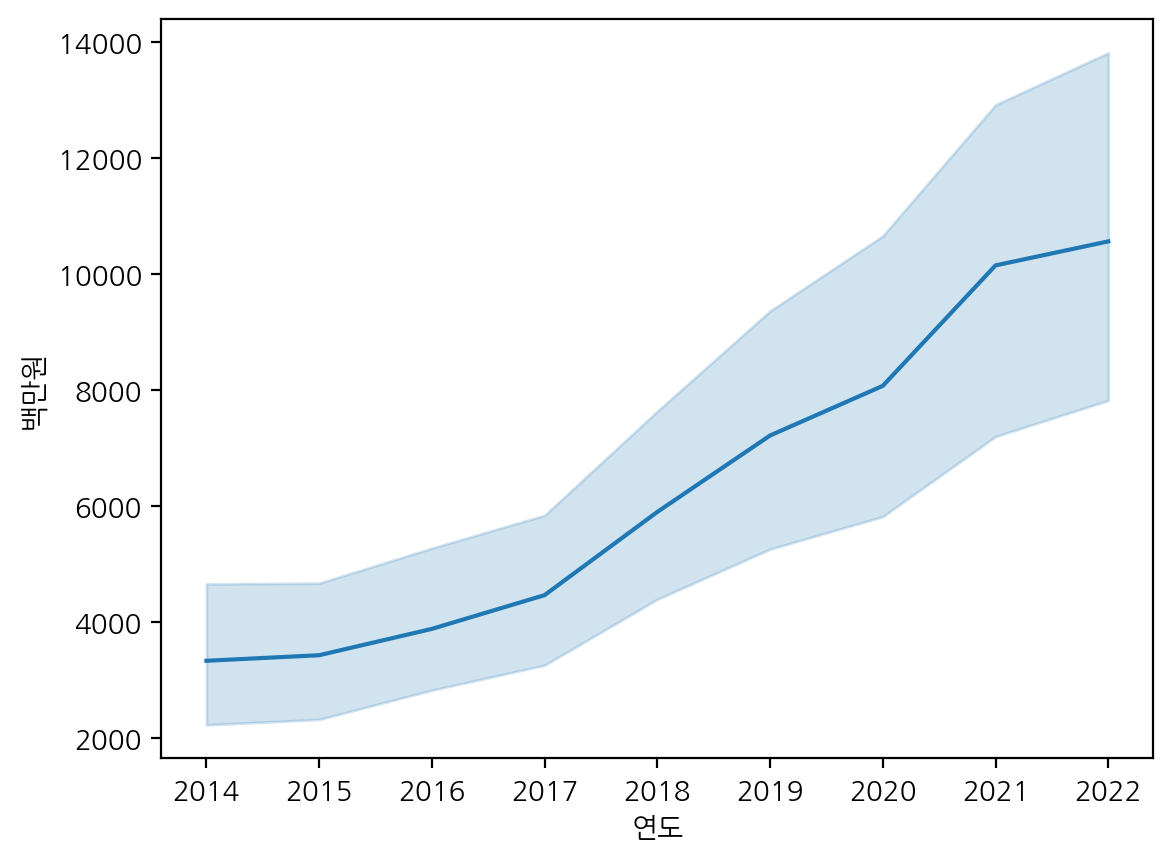

In [23]:
# plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연도",y="백만원")
# 2014 ~ 2022 판매액 계속 증가

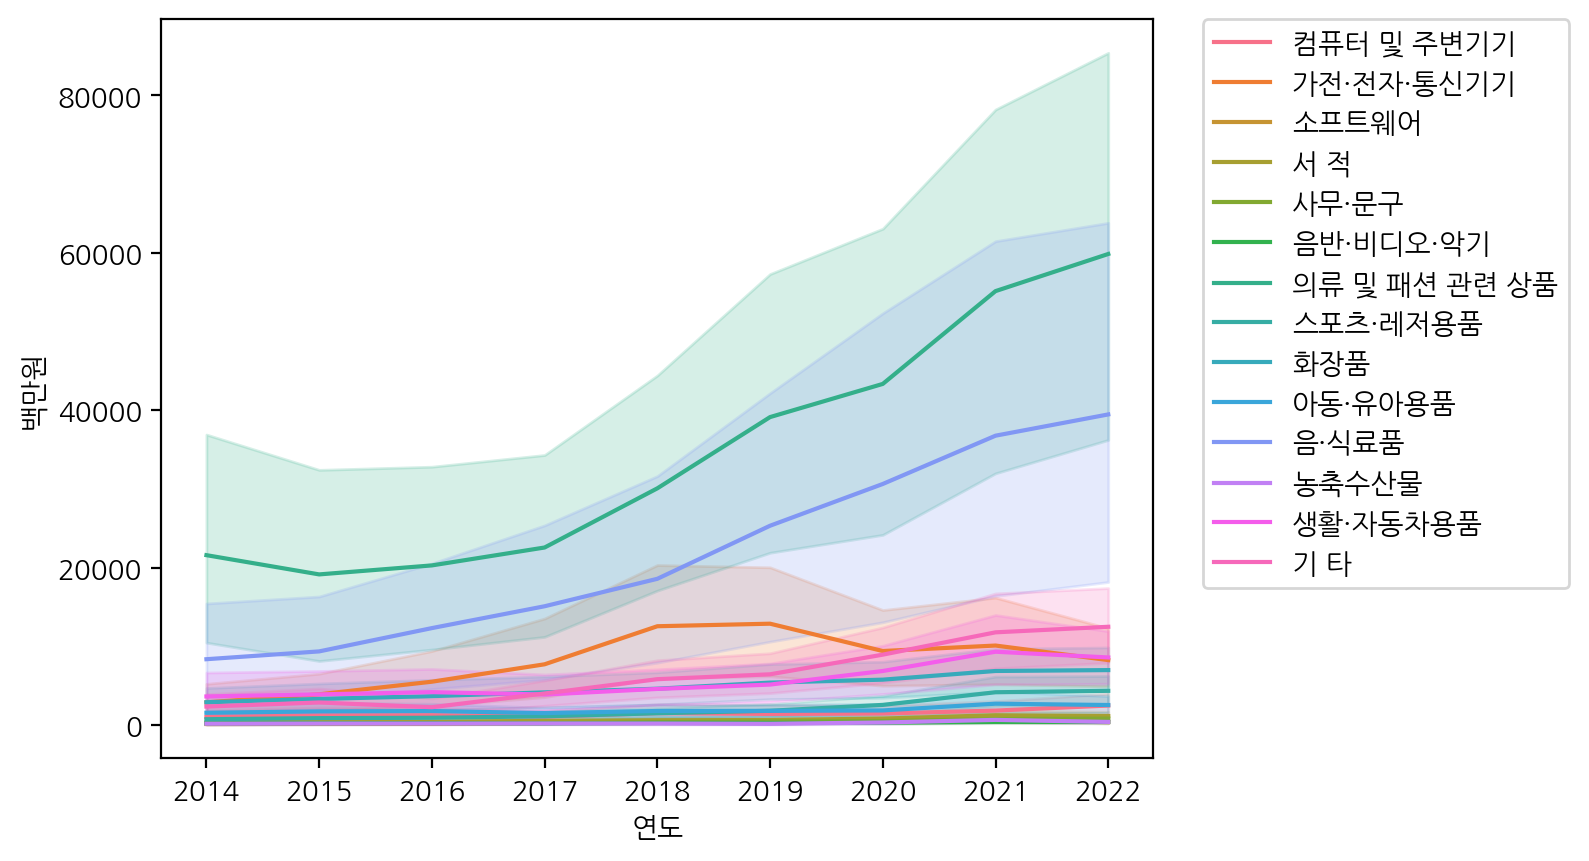

In [24]:
# 상품군별로 다른 색상으로 표시
sns.lineplot(data=df, x="연도",y="백만원",hue="상품군별(1)")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) # legend값 밖에 표시하는 소스코드

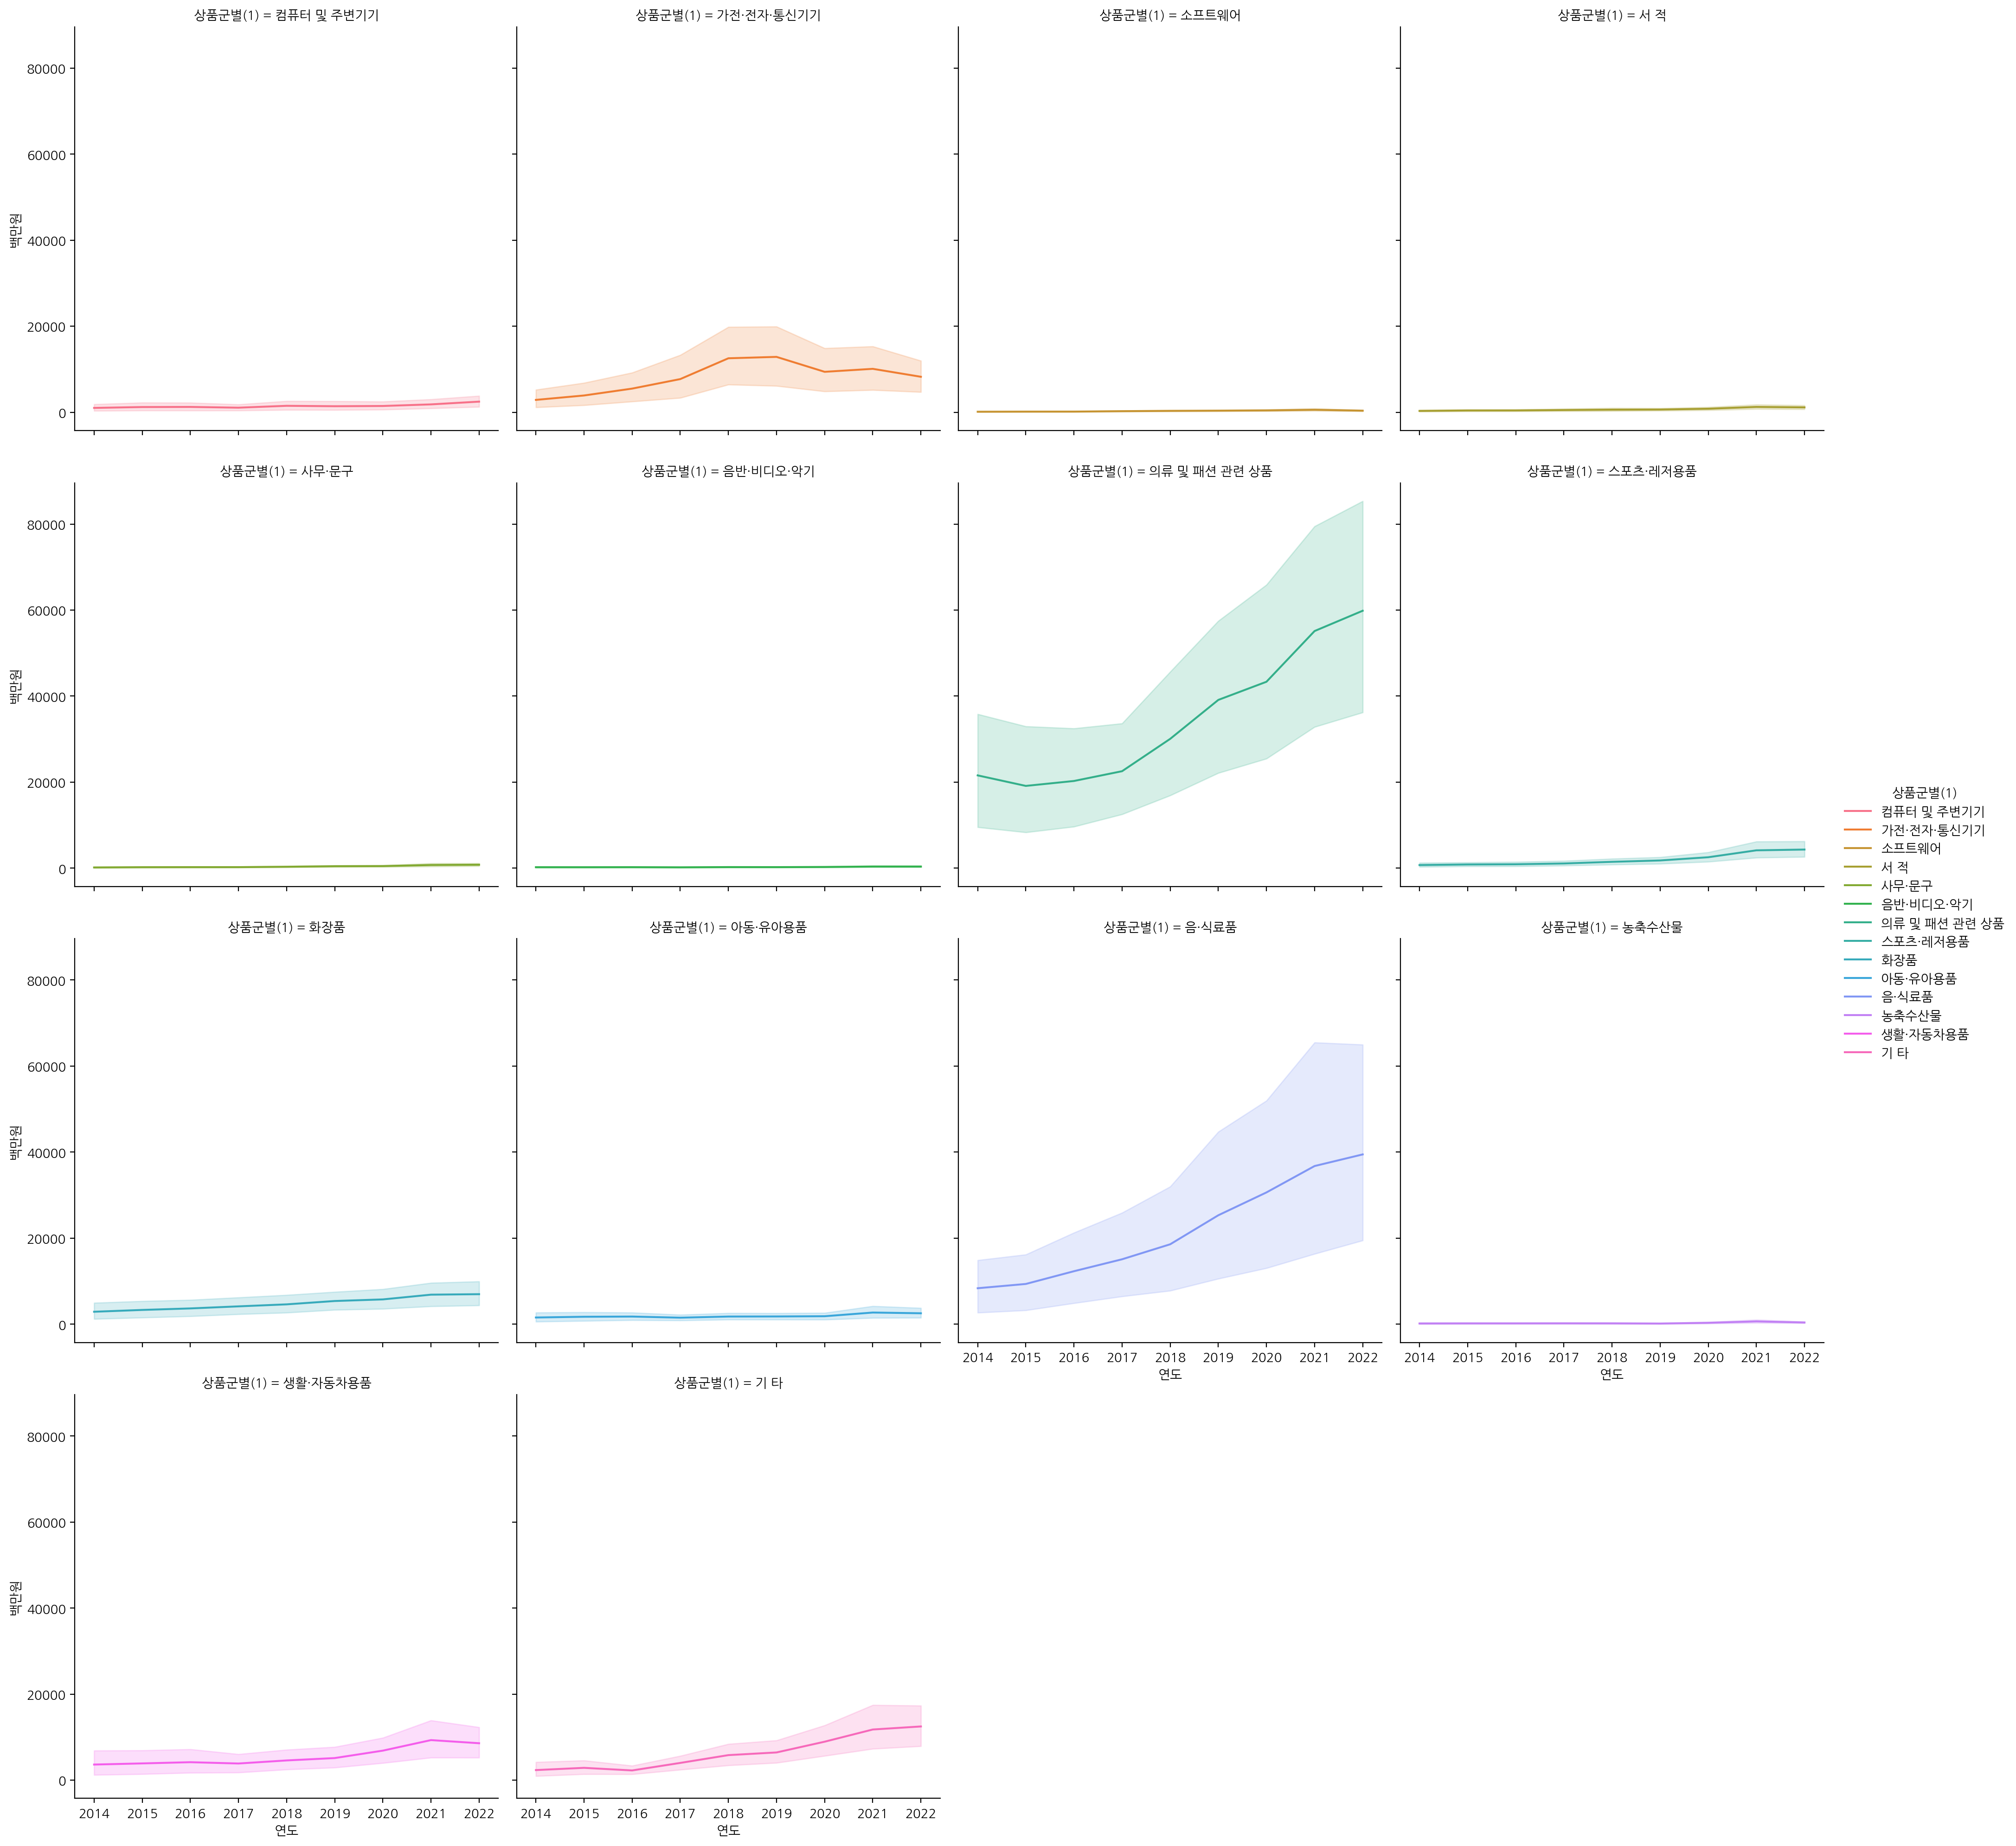

In [25]:
# df_sub
sns.relplot(data=df,x="연도",y="백만원", hue="상품군별(1)",kind="line",col="상품군별(1)",col_wrap=4)
# col_wrap 한줄에 몇개 표시할건지

In [26]:
df_sub = df[~df["상품군별(1)"].isin(["화장품","의류및 패션관련 상품"])].copy()
# isin을 사용해 화장품,의류만 제외를 하고 df_sub에 담음
df_sub

,지역별(1),상품군별(1),기간,백만원,연도,분기
18,아시아,컴퓨터 및 주변기기,2014.1/4,NaN,2014,1
19,아시아,가전·전자·통신기기,2014.1/4,NaN,2014,1
20,아시아,가전·전자·통신기기,2014.1/4,NaN,2014,1
21,아시아,가전·전자·통신기기,2014.1/4,NaN,2014,1
22,아시아,소프트웨어,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...
11946,기타,아동·유아용품,2023.1/4 p),NaN,2023,1
11947,기타,음·식료품,2023.1/4 p),NaN,2023,1
11948,기타,농축수산물,2023.1/4 p),NaN,2023,1
11949,기타,생활·자동차용품,2023.1/4 p),NaN,2023,1


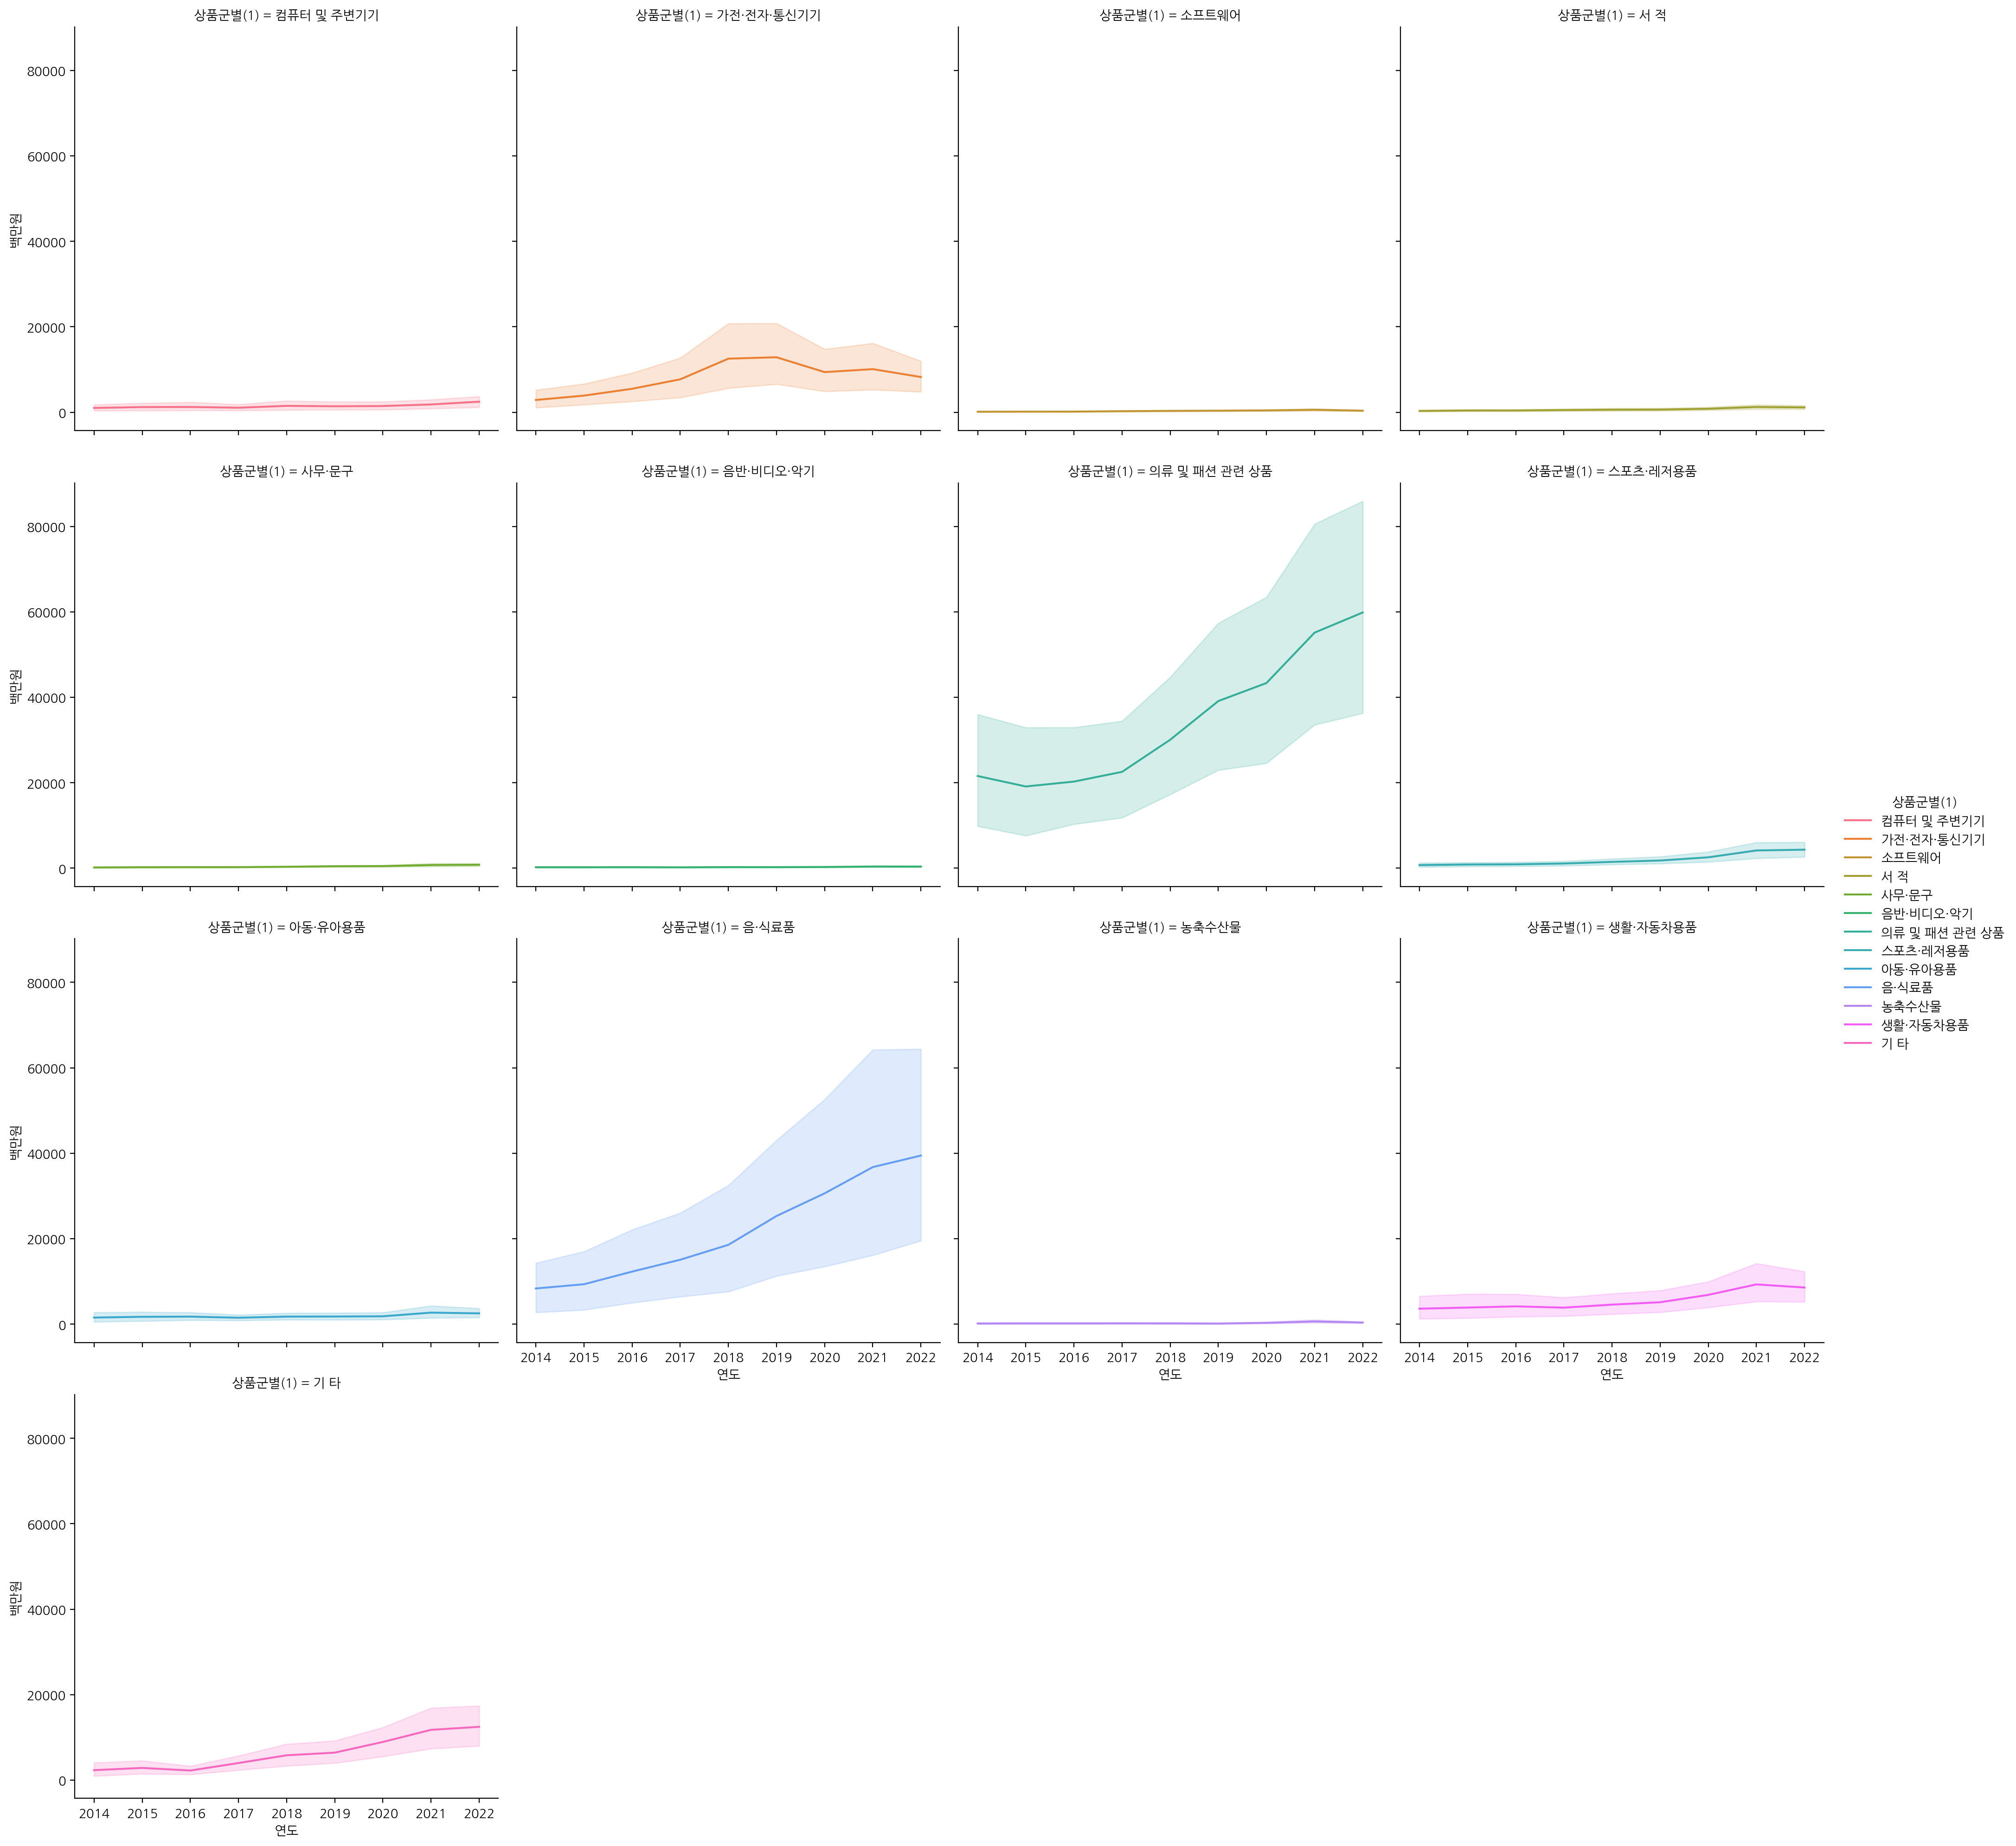

In [27]:
# sns.relplot
sns.relplot(data=df_sub,x="연도",y="백만원",hue="상품군별(1)",col="상품군별(1)",col_wrap=4,kind="line")
# 화장품 , 패션이 굉장히 증가하고 있다.

### 화장품의 온라인쇼핑 해외직접판매액

In [ ]:
df_cosmetic = df[df["상품군별(1)"] == "화장품"].copy()
# copy() 사용안할시 df_comestic의 데이터를 바꾸면 df에 영향을 미칠 수 있음. 
df_cosmetic["상품군별(1)"].unique()


<Axes: xlabel='연도', ylabel='백만원'>

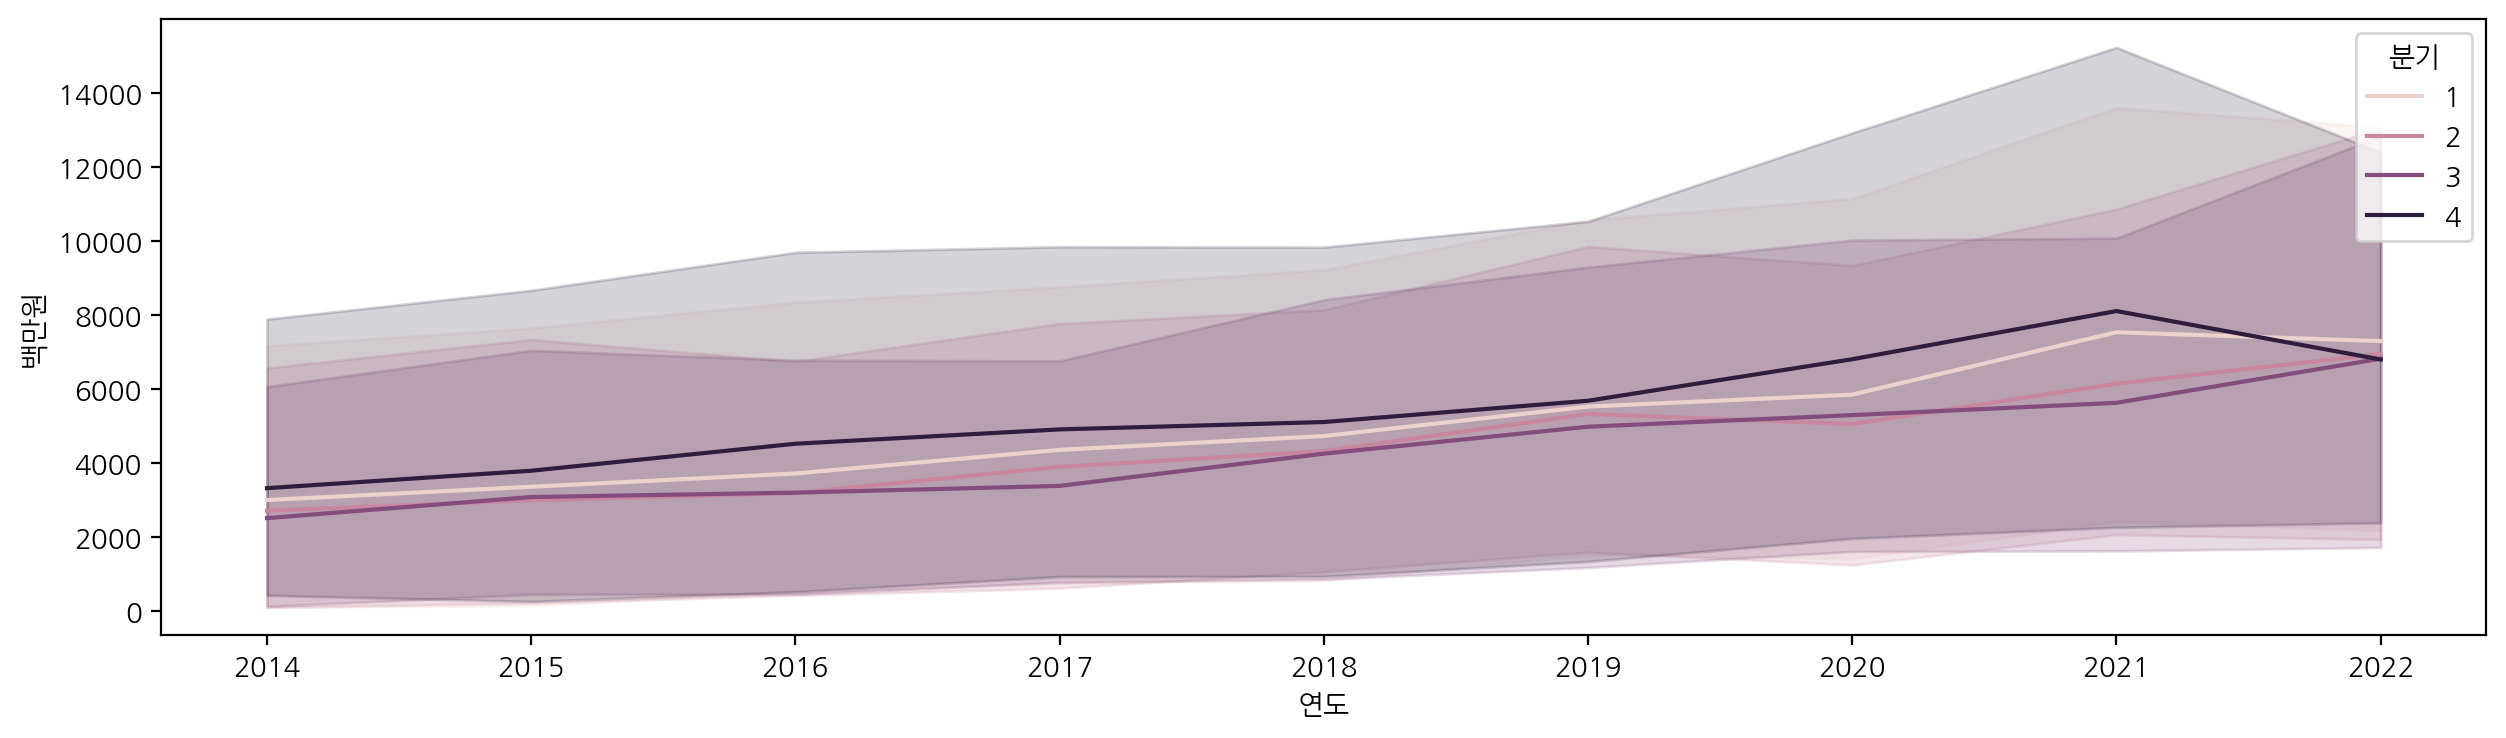

In [36]:
# lineplot, 분기별로 다른 색상으로 표현
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic,x="연도",y="백만원",hue="분기")

<Axes: xlabel='기간', ylabel='백만원'>

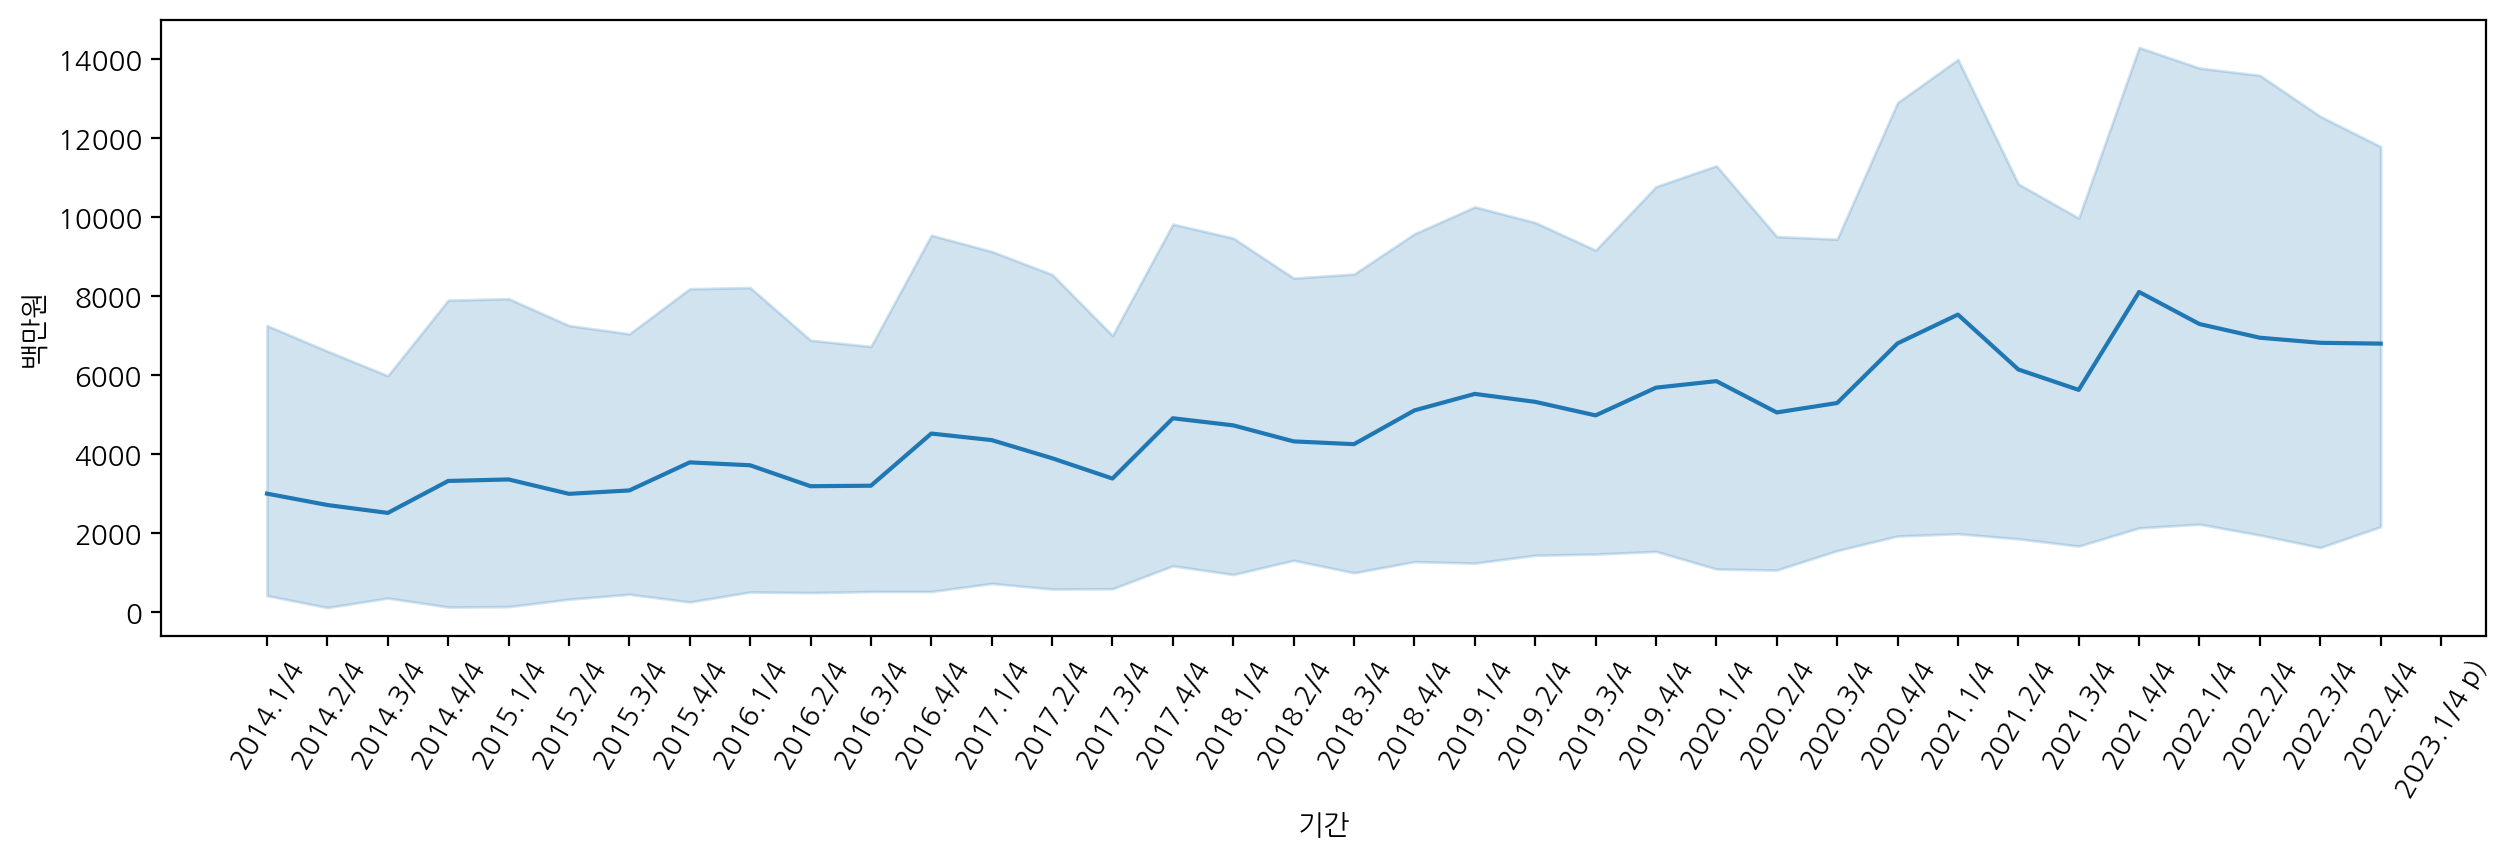

In [37]:
# 기간별 금액 데이터 시각화
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.lineplot(data=df_cosmetic,x="기간",y="백만원")

<Axes: xlabel='기간', ylabel='백만원'>

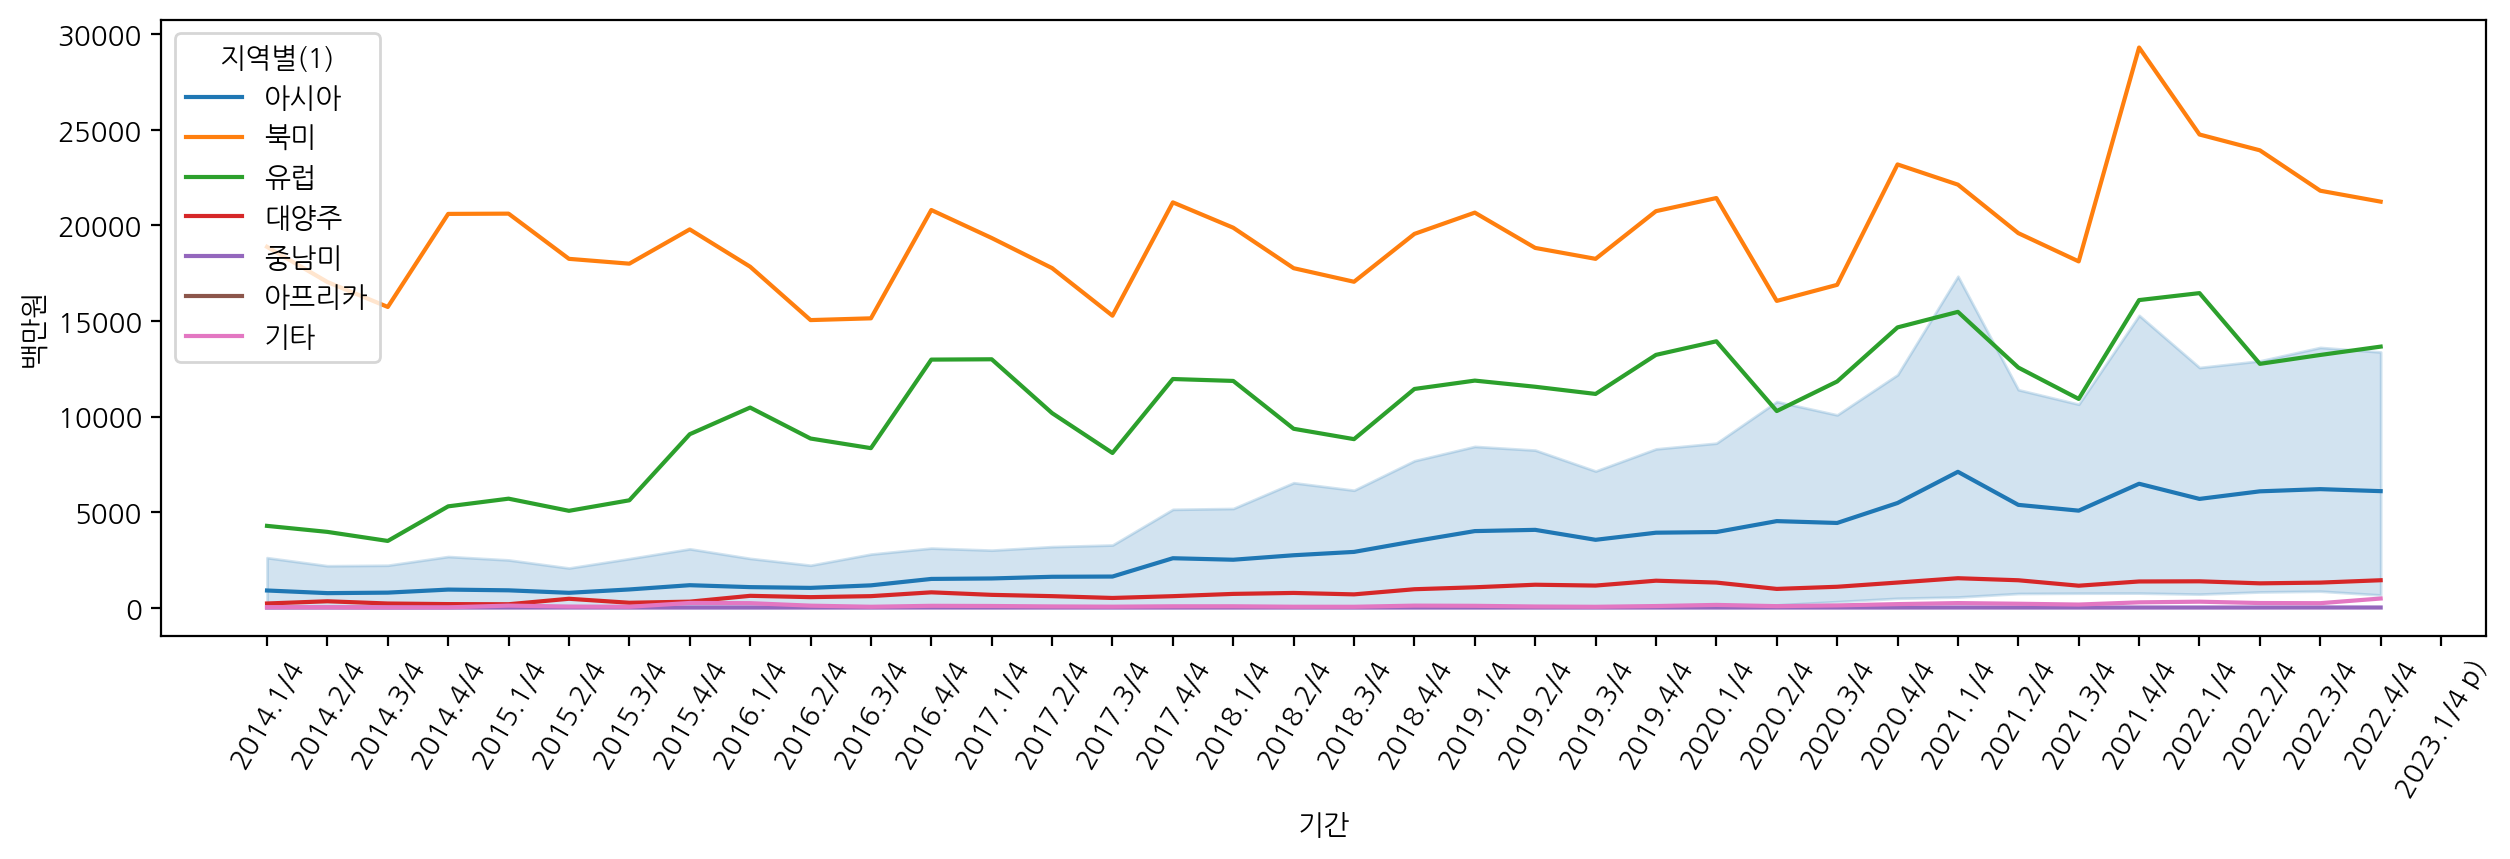

In [39]:
# 국가(대륙)별 다른 색상 표시
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.lineplot(data=df_cosmetic,x="기간",y="백만원",hue="지역별(1)")

<Axes: xlabel='기간', ylabel='백만원'>

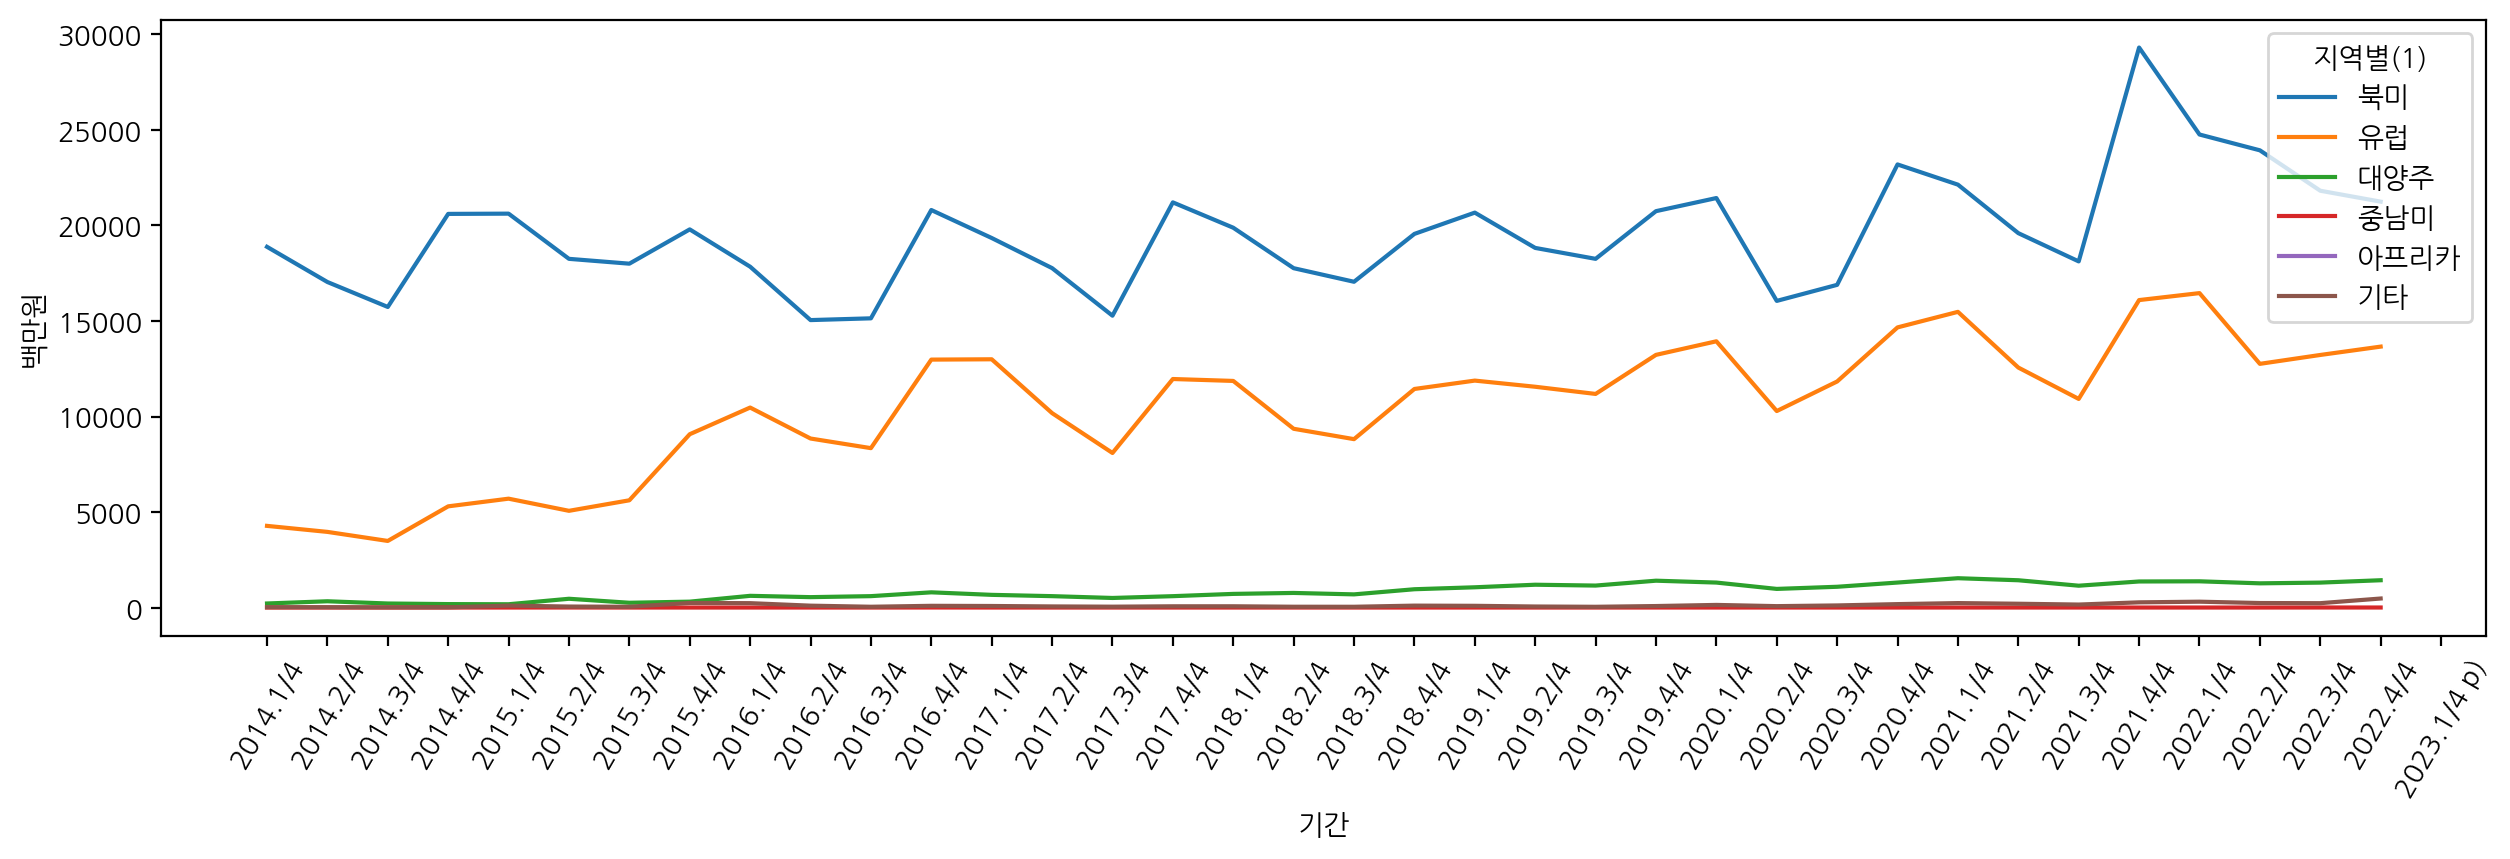

In [43]:
# 국가(대륙)별 다른 색상 표시(아시아 제외)
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.lineplot(data=df_cosmetic[df_cosmetic["지역별(1)"]!="아시아"],x="기간",y="백만원",hue="지역별(1)")

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [67]:
# df_fashion 
df_fashion = df[df["상품군별(1)"]=="의류 및 패션 관련 상품"].copy()
df_fashion.head()


,지역별(1),상품군별(1),기간,백만원,연도,분기
26,아시아,의류 및 패션 관련 상품,2014.1/4,NaN,2014,1
43,아시아,의류 및 패션 관련 상품,2014.1/4,41134.0,2014,1
60,아시아,의류 및 패션 관련 상품,2014.1/4,1940.0,2014,1
77,아시아,의류 및 패션 관련 상품,2014.1/4,182.0,2014,1
94,아시아,의류 및 패션 관련 상품,2014.1/4,13.0,2014,1


<Axes: xlabel='기간', ylabel='백만원'>

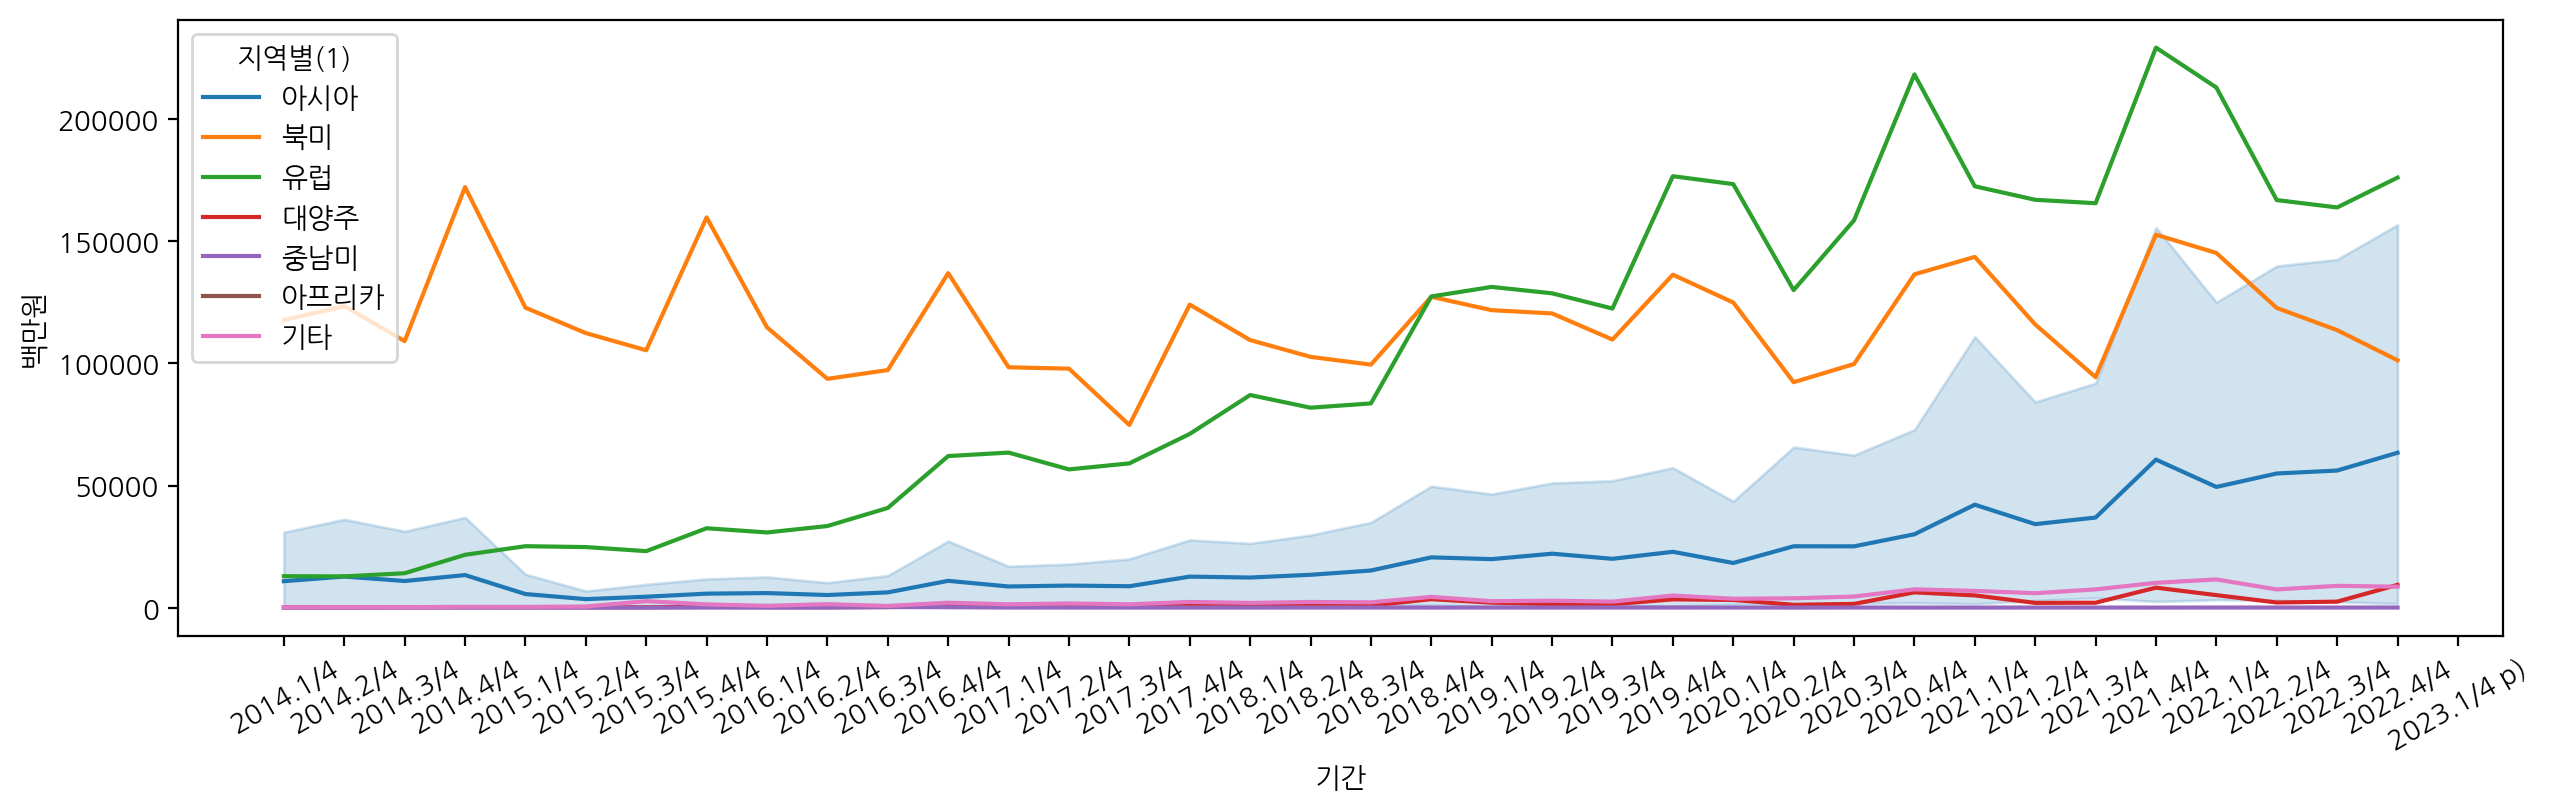

In [71]:
# 판매액 기간별 금액 데이터 시각화, 국가(대륙)별 다른 색상으로 표시

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion,x="기간",y="백만원",hue="지역별(1)")

### 데이터 집계하기

In [76]:
# 피봇테이블 표 형태로 구하기
result = df_fashion.pivot_table(index="지역별(1)",columns="연도",values="백만원")
# 평균금액을 나타냄 
# 합계를 구하고싶으면 aggfunc="sum" 하면 됨

### 연산결과를 시각적으로 보기

<Axes: xlabel='연도', ylabel='지역별(1)'>

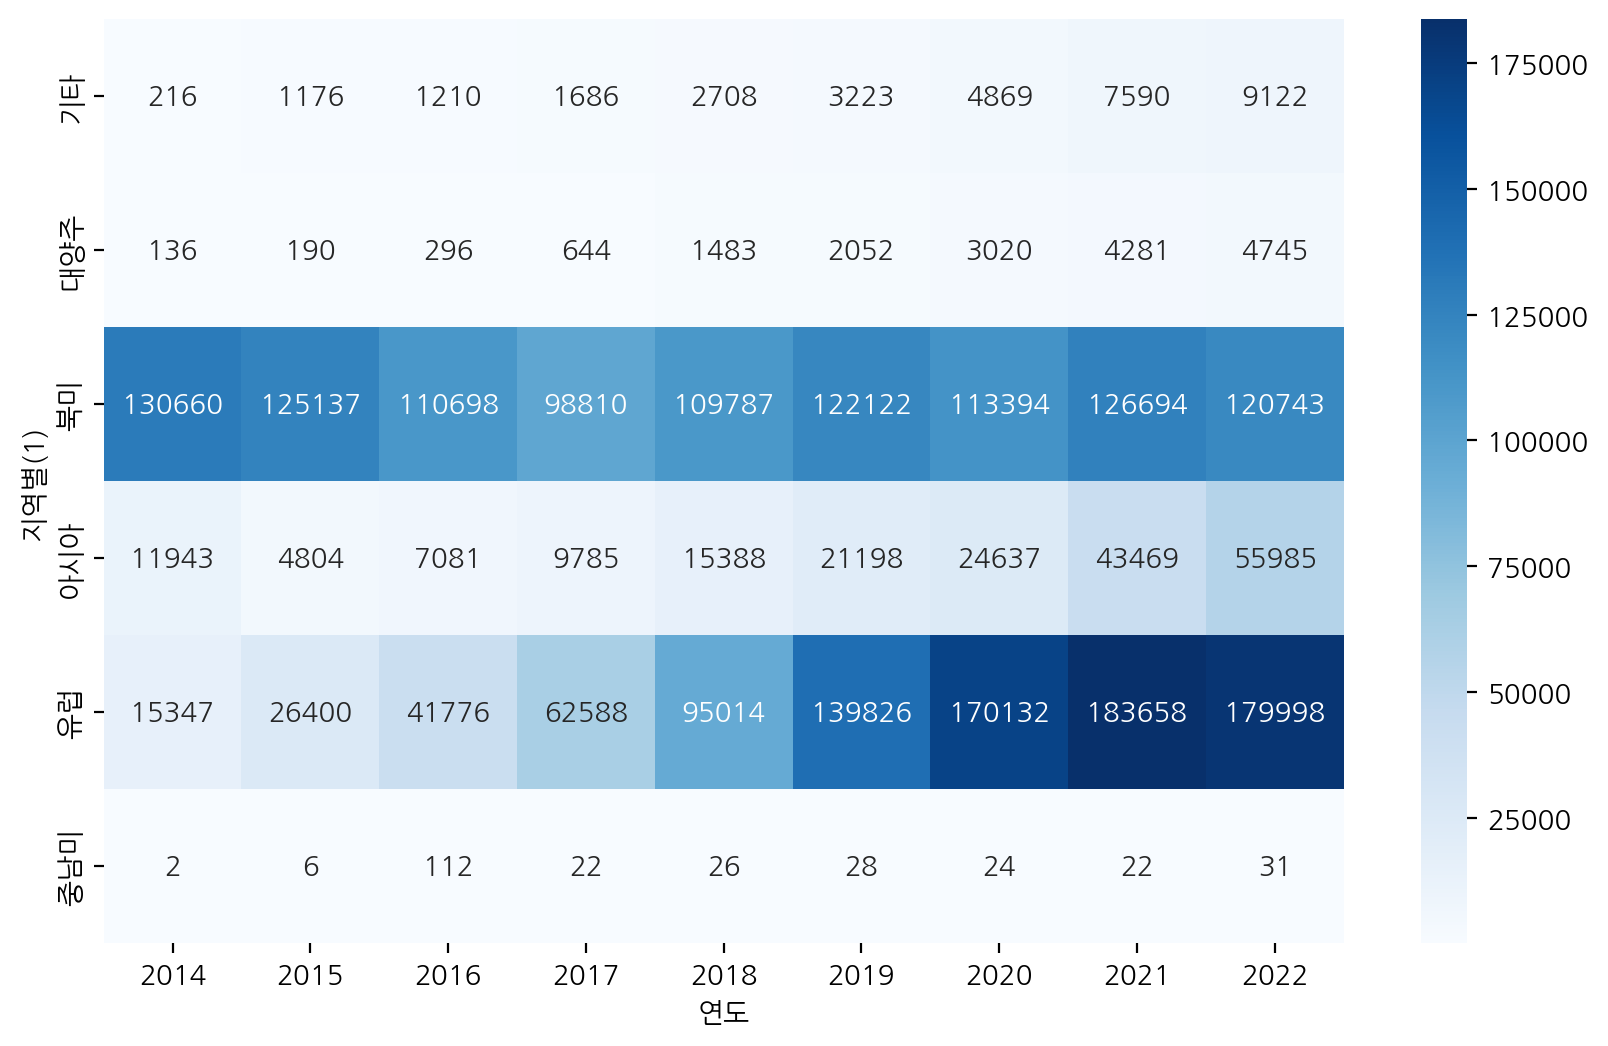

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(result,cmap="Blues",annot=True,fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<Axes: xlabel='연도', ylabel='백만원'>

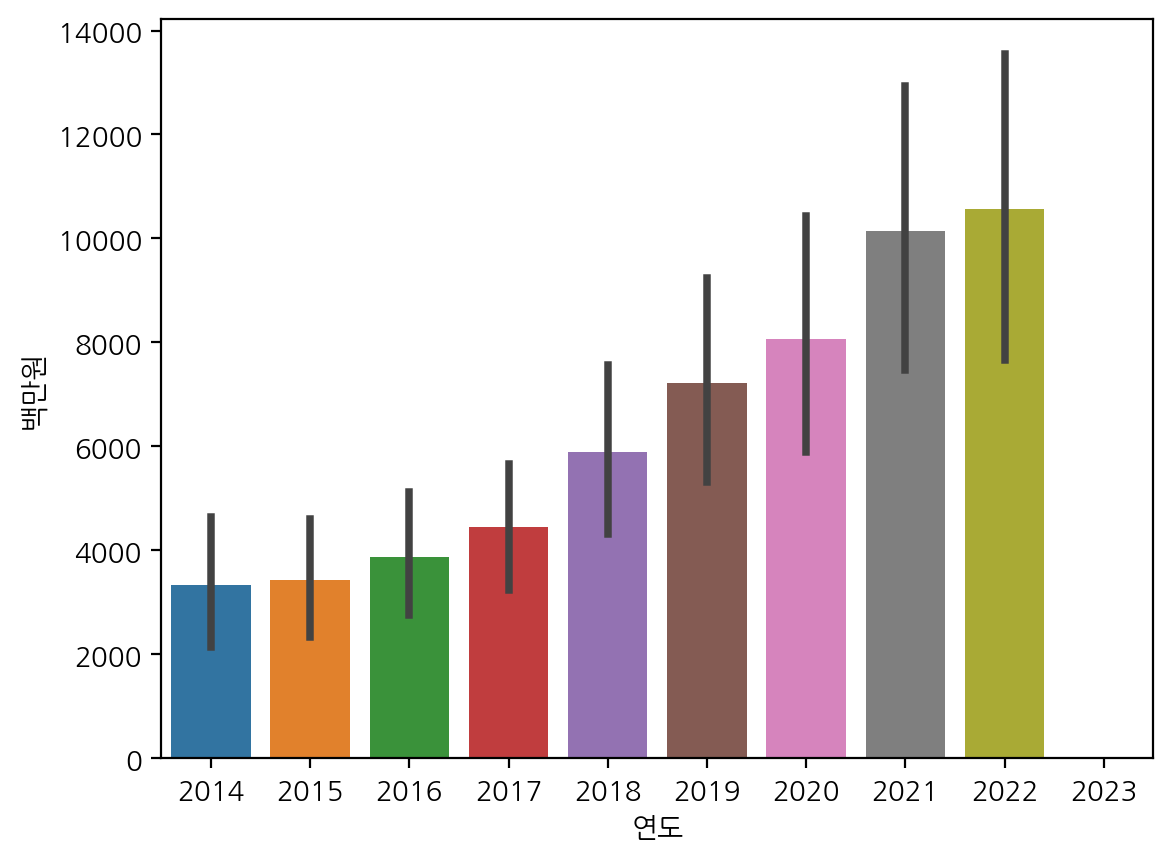

In [87]:
sns.barplot(data=df,x="연도",y="백만원")

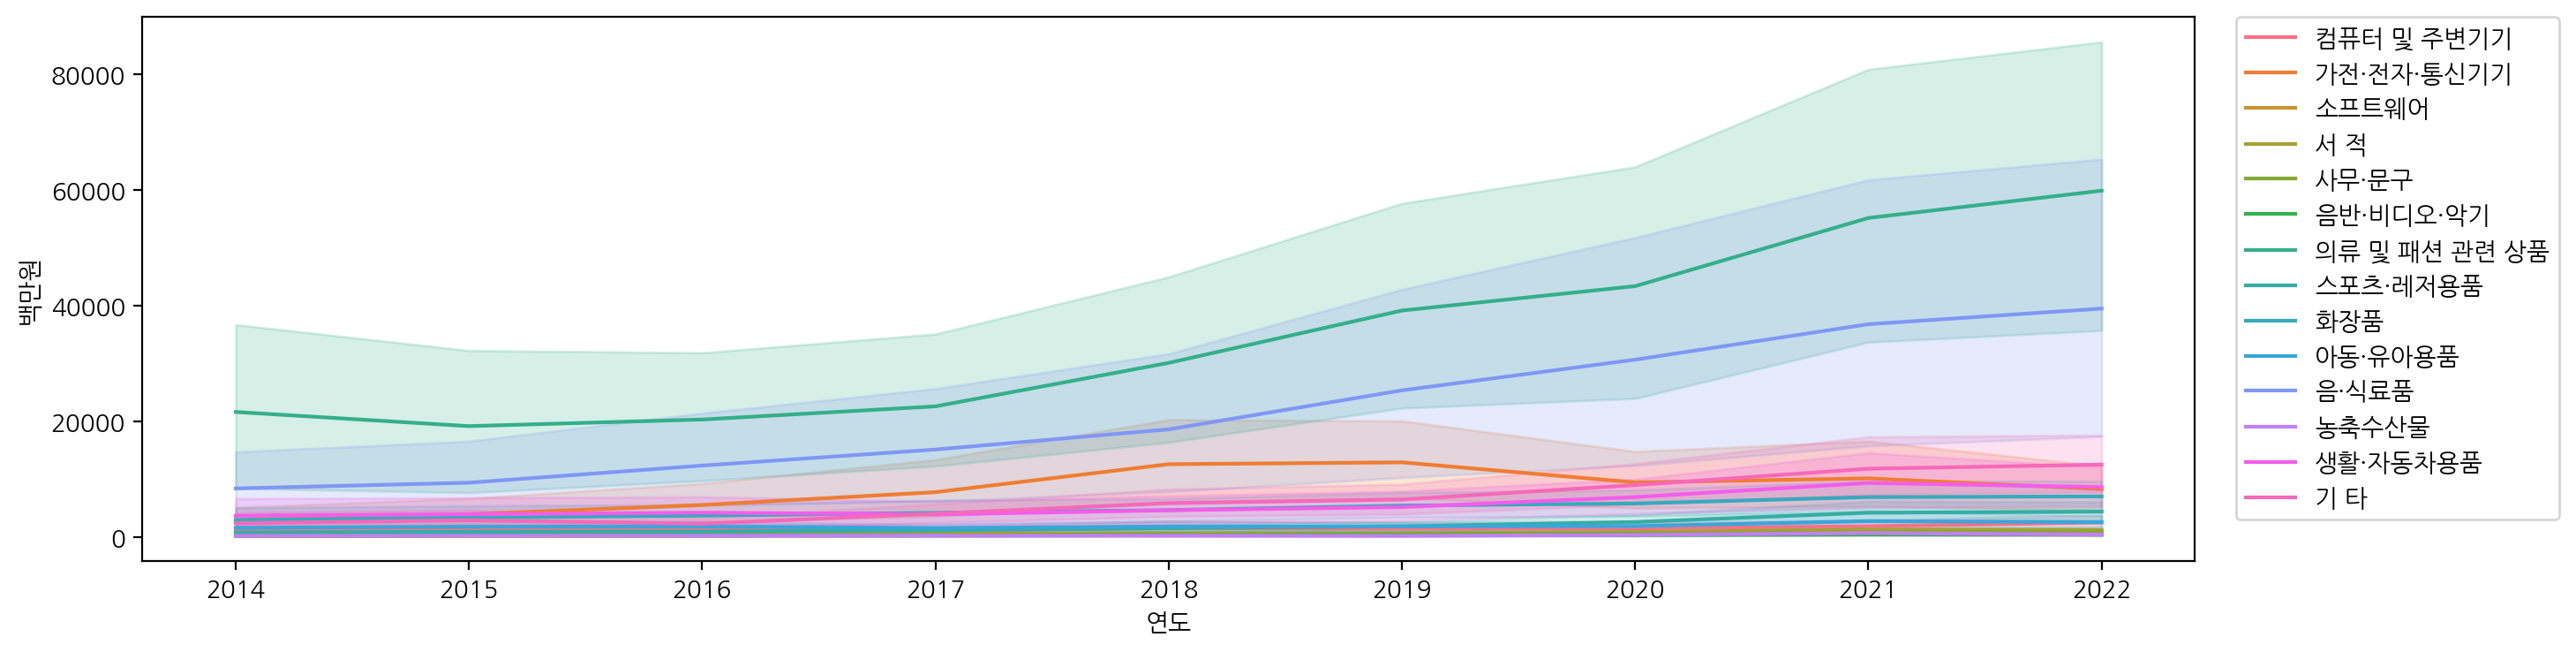

In [94]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df,x="연도",y="백만원",hue="상품군별(1)")
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)